# 📘 Proyecto de Aula - Fundamentos en Ciencia de Datos

*"Análisis del comportamiento e identificación de patrones en el valor de las donaciones y desperdicios de alimentos de una empresa del sector cárnico mediante técnicas de ciencia de datos"*

**Objetivos**

•	Recolectar y depurar la base de datos histórica de donaciones y del desperdicio de alimentos de la empresa del sector cárnico desde el año 2022, garantizando la calidad, consistencia y completitud de la información.

•	Describir las variables relevantes asociadas al valor de las donaciones y del desperdicio de alimentos, diferenciando entre variables categóricas y numéricas, para comprender su estructura y posibles relaciones.


In [18]:
# Librerías
import pandas as pd
import unicodedata
import numpy as np
import os


# **4. Descripción de la base de datos**

En este apartado se ahonda en el reconocimiento de la base de datos, como primer paso para su respectivo análisis.

In [2]:
# Leer el archivo CSV 
df = pd.read_csv("desguace_data_hist.csv")

In [3]:
# Visualizar una pequeña muestra de los datos
df.head()

,Concatenado,Semana,Mes Calendario,Factura,FechaFact#,Material,Denominación,Cantidad,UMB,C# Motivo ped,...,Prod-Ubicación,Planta,Red,Negocio,año,Oficina de ventas,Descripcion de la oficina,Ord/Ext,Causales,Causales NUEVOS
0,2031253NN47,2025.23,junio,N110809010,2025-06-05,2031253.0,Lomos atun ZENU en Aceite Girasol x 120g,2.0,UN,D19,...,2031253NN47,Medellín,Red de Operaciones,Comercial Nutresa,2025.0,10,R Bogotá,D. Ordinaria,Avería en Operación,Avería en Operación
1,1075038NN20,2025.23,junio,N110809038,2025-06-05,1075038.0,Mortadela rapiya precocida CUNIT x 450g,5.0,UN,VMW,...,1075038NN20,Medellín,Red Comercial,Negocio Cárnico,2025.0,10,R Bogotá,D. Ordinaria,Baja Rotación,Baja Rotación
2,2011706NN91,2025.23,junio,N110809480,2025-06-05,2011706.0,Maiz Dulce ZENU x 241 g,2.0,UN,VMU,...,2011706NN91,Comprado,Red Comercial,Comercial Nutresa,2025.0,16,R Medellín,LV Ordinaria,Devolución de Clientes,Devolución de Clientes
3,1079335NN21,2025.23,junio,INN710497,2025-06-06,1079335.0,Picada Mixta Lomo y Tocino RANCHERA 500g,4.0,UN,VD5,...,1079335NN21,Envigado,Red de Operaciones,Negocio Cárnico,2025.0,12,R Bucaramanga,D. Ordinaria,Avería en Operación,Avería en Operación
4,1000571NN21,2025.23,junio,INN710498,2025-06-06,1000571.0,Mtdela. ZENU pll. x 250 g,14.0,UN,VC6,...,1000571NN21,Medellín,Red de Operaciones,Negocio Cárnico,2025.0,12,R Bucaramanga,D. Ordinaria,Perdida de Vacío,Perdida de Vacío


***Proceso de depuración***

En vista del tamaño de la base de datos, se procede a exportar en un excel con el nombre "estadisticas_descriptivas.xlsx" con las 42 variables y su respectiva descripción. En este documento hay tres pestañas, la primera pestaña "Depuración_Conocimiento" dónde se encuentran las 42 variables y subrayadas en rojo las variables que se depuran y cada una con un comentario explicativo. En la segunda pestaña "Depuración_Literatura" se encuentra la data depurada del proceso anterior con 23 variables y subrayado en amarillo las variables que se deciden depurar, para finalmente obtener 17 variables de interés para el estudio. A continuación se detalla paso a paso este proceso.

In [4]:
# Obtener estadísticas descriptivas
estadisticas = df.describe(include="all")

# Exportar a Excel
estadisticas.to_excel("estadisticas_descriptivas.xlsx", index=True)


**SELECCIÓN DE VARIABLES DE INTERÉS**

En vista de que la base de datos es de tamaño considerable y para el estudio algunas variables son innecesarias, se realizan dos filtros para seleccionar las variables de interés. En primer lugar se depura las variables sin objetivo propio, por ejemplo, variables redundantes, duplicadas, etc. Que se presentan a continuación con su debida justificación:

| 🧩 **Variable** | 📐 **Motivo eliminación** |
|------------------|-------------|
|  **1 Concatenado**  | Es un campo de código de concatenación entre otras coolumnas |
|  **2 Semana**     | Se puede obtener del campo fecha |
|  **3 Mes Calendario**      | Se puede obtener del campo fecha |
|  **4 Factura**  |  No aporta información relevante al análisis |
|  **5 Denominación**  | Es la descripción del material |
|  **6 UMB**    | La Unidad de Medida Base, es una variable que no aporta infromación al análisis. |
|  **7 Doc#vtas#**    | No aporta información relevante al análisis |
|  **8 Rsp Pa**    | No aporta información relevante al análisis |
|  **9 Clase de Doc Ventas**    | No aporta información relevante al análisis |
|  **10 C# Costos**    | El centro de costos es un dato relevante para análisis financieros |
|  **11 Texto**    | Son textos de reporte que no tienen una línea de información estricta |
|  **12 Centro**    | Son los nombres del código del centro de costos |
|  **13 Motivo de desguace**    | Se elimina, porque es igual al campo "CAUSAL" |
|  **14 Prod-Ubicación**    | Es una combinación entredos campos |
|  **15 Año**    | El campo se puede extraer del campo "fechafact" |
|  **16 Oficina de ventas**    | Campo duplicado "oficina de ventas" |
|  **17 Descripcion de la oficina**    | Es la descripción de la oficina de ventas |
|  **18 Causales**    | Está incompleto, la variable completa es CAUSALES NUEVAS |
|  **19 Motivo de pedido**    | Es la descripción del C#motivopedido |


En una segunda fase, para elegir las variables por medio de una búsqueda de literatura, Akkaş y Gaur (2022) analiza el problema del desperdicio de alimentos y propone una agenda de investigación dentro del campo de la gestión de operaciones (OM) para contribuir a su reducción. Aunque el interés en este tema ha aumentado notablemente desde 2010, el enfoque desde la OM sigue siendo limitado en comparación con otras disciplinas. El estudio clasifica el desperdicio según su tipo, causas, etapas de la cadena de valor y cuestiones relacionadas con su cuantificación, reducción y recuperación.

La agenda de investigación se organiza en cinco áreas clave: tecnología, logística, incentivos y coordinación, innovación en modelos de negocio y operaciones conductuales. Además, Akkaş y Gaur (2022) resalta el potencial educativo del tema en cursos de OM y las oportunidades que ofrecen las tecnologías digitales y las plataformas de recuperación de alimentos. En conclusión, hace un llamado a la comunidad académica para fortalecer la investigación interdisciplinaria y desarrollar soluciones innovadoras frente a este desafío global.

Así que, como bien lo menciona Akkaş y Gaur (2022) es un tema actual y no hay estudios que analicen este tema desde la Invetsigación de operaciones, por lo tanto no hay una guía para especificar qué variables serían de interés. Es por esto que apuntando al avance que existe en el proyecto, se ilustra en la Figura 1, el modelo que se quiere estudiar y a partir de esta figura y las reuniones con expertos en el sector, se eligen las siguinetes variables a estudiar:

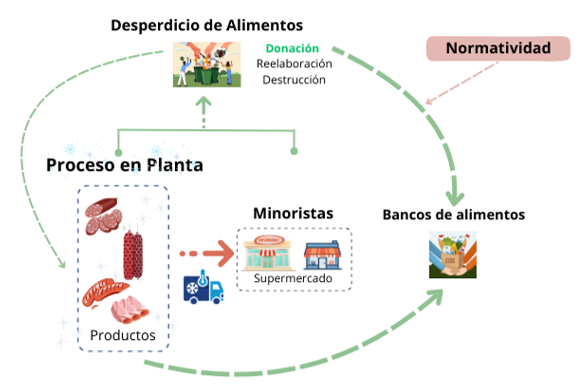




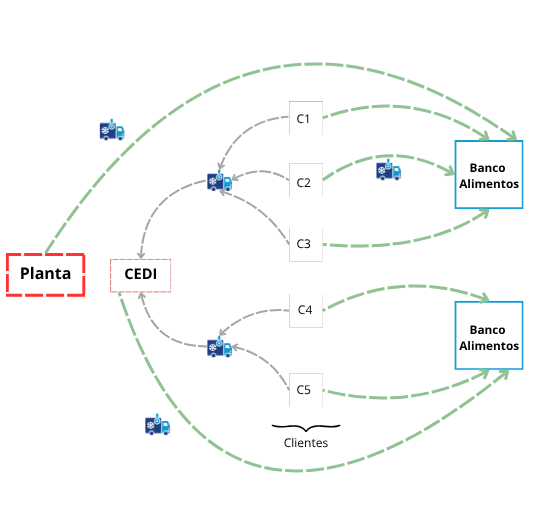


Figura 1. Elaboración Propia

**Descripción Variables del Dataset**

Finalmente se obtiene esta base de datos, que es la que representa las variables de interés. La fuente de todos los datos es de una data oficial proporcionada por la compañía, en dónde se cuenta con la declaración de privacidad y el permiso para el uso de sus datos. 





| 🧩 Variable      | 📐 Tipo        | 📝 Descripción                                                                 |
|------------------|---------------|---------------------------------------------------------------------------------|
| 1. cantidad   | Discreto | Número de productos de alimentos donados o destruídos    |
| 2. valor      | Discreto | Costo de productos de alimentos donados o destruídos     |
| 3. peso_kg    | Discreto | Peso de cada producto de alimentos donados o destruídos |
| 4. desperdicio_kg  | Discreto  | Peso de productos de alimentos donados o destruídos  |
| 5. material    | Categórica/Código    | Código de identificación de los productos que donaron o destruyecron  |
| 6. motivo  | Categórica/Código      | Razón por la cuál se dona o destruye los productos   |
| 7. FechaFact#   | Date   | Fecha en la que se hizo la donación o la destrucción |
| 8. planta   | Categórica/Código        | Código de la planta en dónde se dona o destruye el producto    |
| 9. centro    | Categórica/Código  | CEDI en dónde se dona o destruye el producto  |
| 10. Ofc#Ventas  | Categórica/Código   | Oficina en dónde se dona o destruye el producto |
| 11. Categoria  | Categórica/Código   | Tipo de material (alimentos larga vida, carnes frescas, etc.)  |
| 12. Subcategoría  | Categórica/Código   | Tipo de material (larga vida carnicos, tajados, etc)  |
| 13. Linea  | Categórica/Código   | Linea de producción de los productos |
| 14. Marca  | Categórica/Código   | Marca de los productos |
| 15. Ord/Ext  | Categórica/Código   | Tipo de demanda de los productos |
| 16. Causales NUEVOS  | Categórica/Código   | Causal de donación o destrucción de los productos |
| 17. Tipo de Desguace  | Categórica/Código   | Identifica si es donación, destrucción o reelaboración de alimentos |





# **5. Limpieza de los datos**

En este apartado el objetivo es unificar y estandarizar el data frame, según las especificaciones del método CRISPDM, por ejemplo el tipo de dato, no uncluír tíldes, etc.. Ya que es necesario para los respectivos análisis posteriores.

In [5]:
print(df.columns)

Index(['Concatenado', 'Semana', 'Mes Calendario', 'Factura', 'FechaFact#',
       'Material', 'Denominación', 'Cantidad', 'UMB', 'C# Motivo ped',
       'Doc#vtas#', 'Rsp Pa', 'C# Centro', 'Valor', 'Clase de Doc Ventas',
       'Ofc# Ventas', 'C# Costos', 'Almacen', 'Lote', 'Texto',
       'Motivo de pedido', 'Centro', 'Regional', 'Clasificación',
       'Tipo de Desguace', 'Motivo de desguace', 'Categoría ', 'Subcategoría',
       'Linea', 'Marca', 'Peso Kg', 'Desguace KG', 'Prod-Ubicación', 'Planta',
       'Red', 'Negocio', 'año', 'Oficina de ventas',
       'Descripcion de la oficina', 'Ord/Ext', 'Causales', 'Causales NUEVOS'],
      dtype='object')


En primer lugar se seleccionan las variables objetivo, ya que es más sencillo manipular una data más pequeña, a demás de que son el interés de estudio. Se agrega nombre_material, pero es por un problema de imputación en la sección 05, pero no porque sea relevante para el análisis o para el proyecto.

In [6]:
# Seleccionar columnas específicas y renombrarlas
df_nuevo = df[["FechaFact#", "Material", "Cantidad", "C# Motivo ped", "Valor", "Peso Kg", "Desguace KG", "Planta", "C# Centro", "Ofc# Ventas", "Categoría ", "Subcategoría",
               "Linea", "Marca", "Ord/Ext", "Causales NUEVOS", 'Tipo de Desguace', 'Denominación'
]].rename(
    columns={
        "FechaFact#": "fecha",
        "Material": "material",
        "Cantidad": "cantidad",
        "C# Motivo ped": "motivo",
        "Valor": "valor",
        "Peso Kg": "peso_kg",
        "Desguace KG": "desperdicio_kg",
        "Planta": "planta",
        "C# Centro": "centro",
        "Ofc# Ventas": "of_ventas",
        "Categoría ": "categoria",
        "Subcategoría": "subcategoria",
        "Linea": "linea",
        "Marca": "marca",
        "Ord/Ext": "demanda",
        "Causales NUEVOS": "causales",
        "Tipo de Desguace": "tipo",
        "Denominación": "nombre_material"
    }
)

# Verifica el resultado
df_nuevo.head()


,fecha,material,cantidad,motivo,valor,peso_kg,desperdicio_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales,tipo,nombre_material
0,2025-06-05,2031253.0,2.0,D19,4904.0,0.120,0.240,Medellín,NN47,10,Alimentos larga vida,NaN,Atún,Zenú,D. Ordinaria,Avería en Operación,Donación,Lomos atun ZENU en Aceite Girasol x 120g
1,2025-06-05,1075038.0,5.0,VMW,20855.0,0.450,2.250,Medellín,NN20,10,Carnes frías,NaN,Mortadela,Cunit,D. Ordinaria,Baja Rotación,Donación,Mortadela rapiya precocida CUNIT x 450g
2,2025-06-05,2011706.0,2.0,VMU,4810.0,0.241,0.482,Comprado,NN91,16,Alimentos larga vida,Larga vida vegetales,Maíz Larga vida,Zenú,LV Ordinaria,Devolución de Clientes,Donación,Maiz Dulce ZENU x 241 g
3,2025-06-06,1079335.0,4.0,VD5,67884.0,0.500,2.000,Envigado,NN21,12,Carnes frescas,NaN,Cerdo,Ranchera,D. Ordinaria,Avería en Operación,Destrucción,Picada Mixta Lomo y Tocino RANCHERA 500g
4,2025-06-06,1000571.0,14.0,VC6,27874.0,0.250,3.500,Medellín,NN21,12,Carnes frías,Tajados,Mortadela,Zenú,D. Ordinaria,Perdida de Vacío,Destrucción,Mtdela. ZENU pll. x 250 g


In [ ]:
# Dimensiones del nuevo DataFrame
df_nuevo.shape

(1814611, 18)

El tamaño del df_nuevo es realmente de 17 variables, que son las imprescindibles para su respectivo análisis. Sin embargo, la variable número 18 "nombre_material" se necesitará en la fase de imputación.

Unificar el tipo de dato de todo el data frame en minúsculas y eliminar tíldes, para evitar redundancia.

In [ ]:
# Función para quitar tildes y convertir a minúsculas
def quitar_tildes(texto):
    if not isinstance(texto, str):
        return texto
    # Normaliza (NFKD separa letras de sus acentos)
    nfkd = unicodedata.normalize('NFKD', texto)
    # Filtra los caracteres que NO son marcas de acento
    return "".join([c for c in nfkd if not unicodedata.combining(c)]).lower()

# Quitar tildes y convertir todo el texto a minúsculas
for col in df_nuevo.select_dtypes(include=["object", "string"]).columns:
    df_nuevo[col] = df_nuevo[col].map(quitar_tildes)

print(df_nuevo.head())


        fecha   material  cantidad motivo    valor  peso_kg  desperdicio_kg  \
0  2025-06-05  2031253.0       2.0    d19   4904.0    0.120           0.240   
1  2025-06-05  1075038.0       5.0    vmw  20855.0    0.450           2.250   
2  2025-06-05  2011706.0       2.0    vmu   4810.0    0.241           0.482   
3  2025-06-06  1079335.0       4.0    vd5  67884.0    0.500           2.000   
4  2025-06-06  1000571.0      14.0    vc6  27874.0    0.250           3.500   

     planta centro of_ventas             categoria          subcategoria  \
0  medellin   nn47        10  alimentos larga vida                   NaN   
1  medellin   nn20        10          carnes frias                   NaN   
2  comprado   nn91        16  alimentos larga vida  larga vida vegetales   
3  envigado   nn21        12        carnes frescas                   NaN   
4  medellin   nn21        12          carnes frias               tajados   

             linea     marca       demanda                causales  

In [ ]:
# Información del nuevo DataFrame
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814611 entries, 0 to 1814610
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   fecha            object 
 1   material         float64
 2   cantidad         float64
 3   motivo           object 
 4   valor            float64
 5   peso_kg          float64
 6   desperdicio_kg   float64
 7   planta           object 
 8   centro           object 
 9   of_ventas        object 
 10  categoria        object 
 11  subcategoria     object 
 12  linea            object 
 13  marca            object 
 14  demanda          object 
 15  causales         object 
 16  tipo             object 
 17  nombre_material  object 
dtypes: float64(5), object(13)
memory usage: 249.2+ MB


**Modificar el tipo de dato**

En vista de que hay algunas variables que no son tipificadas debidamente, se procede a tipificarlas de forma lógica dado el contexto.

In [10]:
# Copia del DataFrame original
df_limpio = df_nuevo.copy()

# --- 1️⃣ Limpiar columna 'material' ya que finaliza en ".0"---
if "material" in df_limpio.columns:
    df_limpio["material"] = pd.to_numeric(df_limpio["material"], errors="coerce").fillna(0).astype(int)

# --- 2️⃣ Convertir fecha al formato YYYY-MM-DD ---
if "fecha" in df_limpio.columns:
    df_limpio["fecha"] = pd.to_datetime(df_limpio["fecha"], errors="coerce").dt.strftime("%Y-%m-%d")

# --- 3️⃣ Definir grupos de variables ---
categoricas = [
    "material", "motivo", "planta", "centro", "of_ventas",
    "categoria", "subcategoria", "linea", "marca", "demanda", "causales","fuente", "tipo"
]

enteras = ["cantidad", "valor"]
continuas = ["peso_kg", "donacion_kg"]

# --- 4️⃣ Conversión eficiente por grupo ---
for col in categoricas:
    if col in df_limpio.columns:
        df_limpio[col] = df_limpio[col].astype("category")

for col in enteras:
    if col in df_limpio.columns:
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors="coerce").fillna(0).astype("int64")

for col in continuas:
    if col in df_limpio.columns:
        df_limpio[col] = pd.to_numeric(df_limpio[col], errors="coerce").round(2)

# --- 5️⃣ Resultado final ---
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814611 entries, 0 to 1814610
Data columns (total 18 columns):
 #   Column           Dtype   
---  ------           -----   
 0   fecha            object  
 1   material         category
 2   cantidad         int64   
 3   motivo           category
 4   valor            int64   
 5   peso_kg          float64 
 6   desperdicio_kg   float64 
 7   planta           category
 8   centro           category
 9   of_ventas        category
 10  categoria        category
 11  subcategoria     category
 12  linea            category
 13  marca            category
 14  demanda          category
 15  causales         category
 16  tipo             category
 17  nombre_material  object  
dtypes: category(12), float64(2), int64(2), object(2)
memory usage: 105.7+ MB


In [11]:
# Verifica el resultado final
df_limpio.head()

,fecha,material,cantidad,motivo,valor,peso_kg,desperdicio_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales,tipo,nombre_material
0,2025-06-05,2031253,2,d19,4904,0.12,0.240,medellin,nn47,10,alimentos larga vida,NaN,atun,zenu,d. ordinaria,averia en operacion,donacion,lomos atun zenu en aceite girasol x 120g
1,2025-06-05,1075038,5,vmw,20855,0.45,2.250,medellin,nn20,10,carnes frias,NaN,mortadela,cunit,d. ordinaria,baja rotacion,donacion,mortadela rapiya precocida cunit x 450g
2,2025-06-05,2011706,2,vmu,4810,0.24,0.482,comprado,nn91,16,alimentos larga vida,larga vida vegetales,maiz larga vida,zenu,lv ordinaria,devolucion de clientes,donacion,maiz dulce zenu x 241 g
3,2025-06-06,1079335,4,vd5,67884,0.50,2.000,envigado,nn21,12,carnes frescas,NaN,cerdo,ranchera,d. ordinaria,averia en operacion,destruccion,picada mixta lomo y tocino ranchera 500g
4,2025-06-06,1000571,14,vc6,27874,0.25,3.500,medellin,nn21,12,carnes frias,tajados,mortadela,zenu,d. ordinaria,perdida de vacio,destruccion,mtdela. zenu pll. x 250 g


In [12]:
# Validar valores en la columna 'tipo'
list(df_limpio["tipo"].unique())

['donacion ',
 'destruccion ',
 'reelaboracion ',
 '0',
 'donacion',
 'destruccion',
 nan]

In [13]:
# Estandarizar valores en la columna 'tipo'
df_limpio["tipo"] = df_limpio["tipo"].replace({
    "donacion ": "donacion",
    "destruccion ": "destruccion",
    "reelaboracion ": "reelaboracion"
})

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_3284\3425524278.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_limpio["tipo"] = df_limpio["tipo"].replace({


In [14]:
# Validar valores en la columna 'tipo'
list(df_limpio["tipo"].unique())

['donacion', 'destruccion', 'reelaboracion', '0', nan]

Se procede a eliminar la categoría de reelaboracion del df_limpio, ya que el objetivo de este proyecto son las sonaciones y las destrucciones.

In [15]:
# Se procede a eliminar la categoría de reelaboracion del df_limpio, ya que el objetivo de este proyecto son las sonaciones y las destrucciones.
df_limpio = df_limpio[df_limpio['tipo'] != 'reelaboracion']

In [ ]:
# Dimensiones del DataFrame limpio
df_limpio.shape

(1813548, 18)

In [19]:
# Obtener la ruta actual de trabajo (carpeta del notebook o script activo)
ruta_carpeta = os.getcwd()

# Nombre del archivo
nombre_archivo = "df_limpio.csv"

# Unir la ruta
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Guardar el DataFrame
df_limpio.to_csv(ruta_completa, index=False, encoding='utf-8')

print(f"✅ Archivo guardado en: {ruta_completa}")


✅ Archivo guardado en: c:\Users\USUARIO\Documents\MSc\proyecto\Modelo_2\df_limpio.csv
